In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Read inputs

In [9]:
tea_blue = pd.read_excel("/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/20220921_Data_Assumptions.xlsx", sheet_name='LCOH_NGR', decimal=',', index_col=0)
tea_blue

,Reference,NGR with CCS,2020,2021,2022,2023,2024,2025,2026,2027,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
Parameter,,,,,,,,,,,,,,,,,,,,,
LHV H2 [kWh/kg],https://www.iea-amf.org/content/fuel_informati...,33.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Discount rate [%],NaN,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lifetime [Years],IEA 2019,25.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Capex [USD/kW],IEA 2019,1680.00,1596.000000,1565.600000,1535.200000,1504.800000,1474.400000,1444.000000,1413.600000,1383.200000,...,1259.228807,1257.067367,1255.013998,1253.063298,1251.210133,1249.449627,1247.777145,1246.188288,1244.678874,1216.000000
Capex [€/kW],IEA 2019,1495.20,1420.440000,1393.384000,1366.328000,1339.272000,1312.216000,1285.160000,1258.104000,1231.048000,...,1120.713638,1118.789956,1116.962459,1115.226336,1113.577019,1112.010168,1110.521659,1109.107577,1107.764198,1082.240000
Opex [€/kW/a],NaN,NaN,42.613200,41.801520,40.989840,40.178160,39.366480,38.554800,37.743120,36.931440,...,33.621409,33.563699,33.508874,33.456790,33.407311,33.360305,33.315650,33.273227,33.232926,32.467200
Opex [% of Capex],IEA 2019,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Efficiency [%],IEA 2019,0.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CO2 capture rate [%],IEA 2019,0.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
GHG =  pd.read_excel("/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/20220921_Data_Assumptions.xlsx", sheet_name='GHG Emissions', decimal=',', index_col=0)
GHG

,Parameter,Ref,1990,1991,1992,1993,1994,1995,1996,1997,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
ID,,,,,,,,,,,,,,,,,,,,,
GHG intensity of electricity generation [g CO2eq/kWh] - Germany,NaN,EEA 2022,652.0,656.0,628.0,631.0,626.0,610.0,580.0,566.0,...,62.59200,46.944000,31.296000,15.64800,0.000000,0.000000,0.000,0.000000,0.000000,0.00
GHG intensity of electricity generation [g CO2eq/kWh] - Norway,NaN,Our world in Data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.18012,3.135090,2.090060,1.04503,0.000000,0.000000,0.000,0.000000,0.000000,0.00
Grey hydrogen emissions [g CO2/MJ H2] - Norway,96.77,Own calculation @ GWP20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Grey hydrogen emissions [kg CO2/kg H2] - Norway,11.6124,Own calculation @ GWP20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Blue hydrogen emissions [g CO2/MJ H2] - Norway,NaN,Own calculation @ GWP20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34.34300,32.479333,30.615667,28.75200,26.888333,25.024667,23.161,21.297333,19.433667,17.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Assumed load factor for compressor electricity consumption [h/a],5000,EHB 2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Assumed load factor for compressor electricity consumption [%],0.570776,EHB 2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Capacity at full load factor [GW_H2_LHV],13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
lcoh_green = pd.read_excel("/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/20220921_Data_Assumptions.xlsx", sheet_name='LCOH_RES', decimal=',', index_col=0)
lcoh_green

,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
ID,,,,,,,,,,,,,,,,,,,,,
United_Arab_Emirates_Onshore_3_low_temp_baseline,7.083424,6.891298,6.715543,6.552560,6.399783,6.255316,6.117722,5.985886,5.858925,5.736129,...,4.691380,4.628208,4.566471,4.512363,4.403312,4.338001,4.274817,4.213586,4.154154,4.096389
United_Arab_Emirates_Offshore_1_low_temp_baseline,11.470109,11.104346,10.787404,10.505314,10.249265,10.013359,9.793456,9.586545,9.390367,9.203187,...,7.248224,7.116204,6.992261,6.880684,6.719989,6.607285,6.500267,6.398248,6.300666,6.207051
United_Arab_Emirates_Offshore_2_low_temp_baseline,15.518520,15.026419,14.603391,14.229709,13.892937,13.584745,13.299293,13.032333,12.780680,12.541890,...,9.892514,9.713566,9.545998,9.395894,9.176013,9.024151,8.880277,8.743419,8.612779,8.487690
United_Arab_Emirates_PV_2_low_temp_baseline,3.990183,3.815470,3.659375,3.516671,3.384029,3.259207,3.140629,3.027147,2.917901,2.812232,...,2.123259,2.077646,2.033698,1.995168,1.933859,1.891448,1.850562,1.811050,1.772783,1.735653
United_Arab_Emirates_PV_3_low_temp_baseline,4.167158,3.984340,3.821167,3.672128,3.533712,3.403554,3.279992,3.161815,3.048116,2.938202,...,2.218239,2.170581,2.124678,2.084494,2.020231,1.975935,1.933247,1.892006,1.852079,1.813348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
South_Africa_PV_4_low_temp_optimistic,4.776238,4.522432,4.311259,4.130247,3.971568,3.830018,3.701980,3.584849,3.476693,3.376044,...,2.316135,2.243911,2.174816,2.115768,2.014671,1.948563,1.885225,1.824345,1.765661,1.708951
South_Africa_Onshore_3_high_temp_optimistic,6.957099,6.651531,6.361605,6.082880,5.812121,5.546874,5.285203,5.025533,4.766533,4.507054,...,3.527896,3.479815,3.432700,3.392380,3.300107,3.248513,3.198556,3.150082,3.102956,3.057060
South_Africa_Offshore_1_high_temp_optimistic,6.420926,6.101068,5.807786,5.532832,5.271000,5.018783,4.773702,4.533933,4.298081,4.065056,...,3.044944,2.985666,2.930034,2.880146,2.806048,2.755060,2.706577,2.660273,2.615880,2.573177


In [12]:
# Interest rate (WACC) in %
i_ngr = float(tea_blue.loc['Discount rate [%]']['NGR with CCS'])
i_ngr

0.08

In [13]:
# Economic lifetime of the plant in years
l_ngr = float(tea_blue.loc['Lifetime [Years]']['NGR with CCS'])
l_ngr

25.0

In [14]:
# Calculate the amortisation factor alpha
alpha_ngr = (i_ngr * (1 + i_ngr) ** l_ngr) / (1 + i_ngr) ** (l_ngr - 1)
alpha_ngr
#round(alpha, 2)

0.08640000000000002

In [15]:
CF = float(tea_blue.loc['Availability [%]']['NGR with CCS'])
CF

0.95

In [16]:
# Plant efficiency in %
n = float(tea_blue.loc['Efficiency [%]']['NGR with CCS'])
n

0.69

In [17]:
# Quantity of captured emissions in kg_CO2/kg_H2
#Q_ce = float(tea_blue.loc['Captured emissions [kgCO2/kgH2]']['NGR with CCS'])
Q_ce

NameError: name 'Q_ce' is not defined

In [18]:
# Quantity of leaked emissions in kg_CO2/kg_H2
#Q_ue = float(tea_blue.loc['Uncaptured emissions [kgCO2/kgH2]']['NGR with CCS'])
Q_ue

NameError: name 'Q_ue' is not defined

In [19]:
# P_ccs is the cost for transporting and storing CO2 in $/t_co2
P_ccs = float(tea_blue.loc['CO2 transport and storage cost [€/t CO2]']['NGR with CCS'])
P_ccs

20.0

In [20]:
# LHV of hydrogen is 33.33 kWh/kg
LHV_h2 = float(tea_blue.loc['LHV H2 [kWh/kg]']['NGR with CCS'])
LHV_h2

33.33

# Calc. blue LCOH

Definition of the cost calculation function for LCOH from NGR. Time relevant variables = capex, opex, P_ng, P_co2
LHV H2 [kWh/kg]
capex_y  [€/kW]
opex_y [€/kW/a]
CF [%]
P_ng_y [€/MWh]
Q_ce [kgCO2/kgH2]
Q_ue [kgCO2/kgH2]
P_ccs [€/t CO2]
P_co2_y [€/t CO2]


In [21]:
def calculate_lcoh_ngr(alpha, capex_y, opex_y, CF, P_ng_y, n, Q_ce_y, P_ccs, Q_ue_y, P_co2_y, LHV_h2):

    result = float(LHV_h2 * ((alpha * capex_y + opex_y) / (CF * 8760) + P_ng_y / 1000 * n) + (Q_ce_y * P_ccs + Q_ue_y * P_co2_y) / 1000)

    return result

In [22]:
# Calculation of LCOH from NGR for every year from 2025 to 2050.
years = np.arange(2025,2051)
result = pd.DataFrame(index=years, columns=['LCOH_BLUE'])
result.index.name = 'Years'


for year in years:

    # get capex, opex, natural gas price and CO2 price of specific year
    capex_y = float(tea_blue.loc['Capex [€/kW]'][year])
    opex_y = float(tea_blue.loc['Opex [€/kW/a]'][year])
    Q_ce_y = float(GHG.loc['Captured emissions [kg CO2/kg H2]'][year])
    Q_ue_y = float(GHG.loc['Blue hydrogen emissions [kg CO2/kg H2] - Norway'][year])
    P_ng_y = float(tea_blue.loc['Gas prices NOR [€/MWh]'][year])
    P_co2_y = float(tea_blue.loc['CO2 price ($/t_co2) EU ETS'][year])

    # calculate lcoe of specific year
    result.LCOH_BLUE.loc[year] = calculate_lcoh_ngr(alpha=alpha_ngr, capex_y=capex_y, opex_y=opex_y, CF=CF, P_ng_y=P_ng_y,
                                              n=n, Q_ce_y=Q_ce_y, P_ccs=P_ccs, Q_ue_y=Q_ue_y, P_co2_y=P_co2_y, LHV_h2=LHV_h2)

result

,LCOH_BLUE
Years,
2025,2.204814
2026,2.208152
2027,2.210877
2028,2.212912
2029,2.214177
2030,2.214583
2031,2.225073
2032,2.23459
2033,2.243021


In [23]:
# Create csv file from results dataframe
import os
path=r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path,'LCOH_NGR.csv')
result.to_csv(output_file, sep = ';')

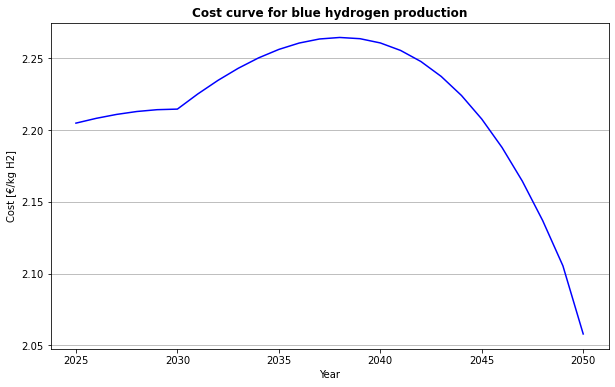

In [24]:
# Plot cost curve of hydrogen production from NGR with CCS
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(result, color = 'blue', linestyle = 'solid')
plt.grid(True, axis = 'y')
ax.set_axisbelow(True)
plt.title('Cost curve for blue hydrogen production', fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Cost [€/kg H2]')
plt.show()

# Green LCOH

In [25]:
# LCOH from RES in €_2019/kg H2 from EWI 2019 [$_2019/kg H2]
green_off1_opt_lowtemp = (lcoh_green.loc['Norway_Offshore_1_low_temp_optimistic', 2025:2050]).mul(0.89)
green_off1_opt_lowtemp

2025    3.725785
2026    3.645457
2027    3.571685
2028    3.503341
2029    3.439566
2030    3.379687
2031    3.269051
2032    3.172866
2033    3.086121
2034    3.006717
2035    2.933354
2036    2.865578
2037    2.801339
2038    2.740772
2039    2.684113
2040    2.628792
2041    2.566542
2042    2.507092
2043    2.451406
2044    2.401402
2045    2.329250
2046    2.278896
2047    2.231150
2048    2.185689
2049    2.142248
2050    2.100605
Name: Norway_Offshore_1_low_temp_optimistic, dtype: float64

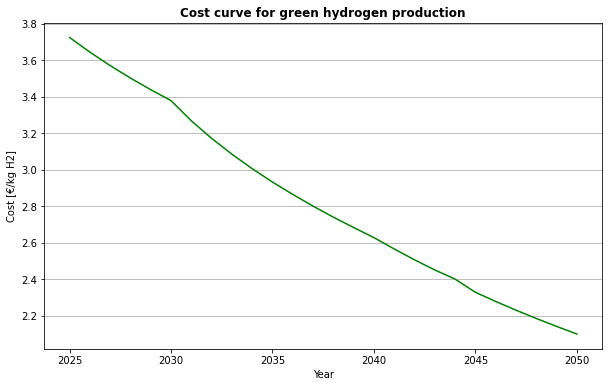

In [26]:
# Plot cost curve of hydrogen production from RES
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(green_off1_opt_lowtemp, color = 'green', linestyle = 'solid')
plt.grid(True, axis = 'y')
ax.set_axisbelow(True)
plt.title('Cost curve for green hydrogen production', fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Cost [€/kg H2]')
plt.show()

# Green and blue


In [27]:
lowest_green = (lcoh_green.loc['Norway_Onshore_1_low_temp_optimistic', 2025:2050]).mul(0.89)

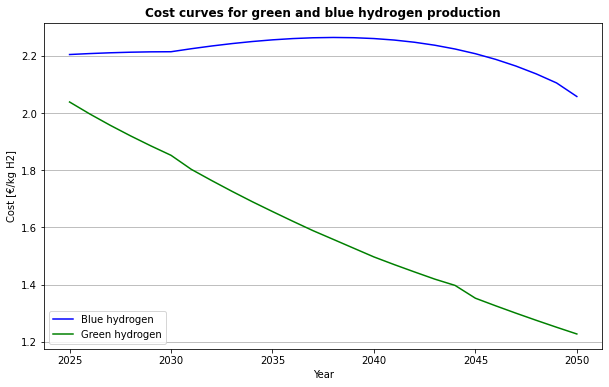

In [28]:
# Plot cost curves of hydrogen production from NGR with CCS and RES
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(result, color = 'blue', linestyle = 'solid', label='Blue hydrogen')
plt.plot(lowest_green, color = 'green', linestyle = 'solid', label='Green hydrogen')
plt.grid(True, axis = 'y')
ax.set_axisbelow(True)
plt.title('Cost curves for green and blue hydrogen production', fontweight='bold')
ax.legend()
plt.xlabel('Year')
#plt.ylim(0)
plt.ylabel('Cost [€/kg H2]')
plt.show()